In [ ]:
!pip install requests beautifulsoup4

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

#Objective: Extract a list of book titles and their corresponding prices from Books to Scrape.

#Steps:
#Navigate to the homepage of the website.
#Identify all book titles and prices listed on the page.
#Save the data into a CSV file with two columns: Title and Price.

url = "https://books.toscrape.com/"
response = requests.get(url)
if response.status_code == 200:

    soup = BeautifulSoup(response.text, 'html.parser')
    books = soup.find_all('article', class_='product_pod')
    data = []
    for book in books:
        title = book.h3.a['title']
        price = book.find('p', class_='price_color').text
        price = price.replace('Â', '')
        price = price.replace('£','')
        data.append({'Title': title, 'Price': price})
    df = pd.DataFrame(data)
    df.to_csv('book_data.csv', index=False)
    print("Data saved to book_data.csv")
else:
    print("error")

Data saved to book_data.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Objective: Extract the top 10 quotes, their authors, and the associated tags from Quotes to Scrape.

#Steps:
#Go to the homepage of the website.
#Extract the text of the first 10 quotes, their authors, and the tags associated with each quote.
#Save the data in a CSV file with three columns: Quote, Author, and Tags.

url = "https://quotes.toscrape.com/"
response = requests.get(url)
if response.status_code == 200:
  soup = BeautifulSoup(response.text,'html.parser')
  quotes = soup.find_all('div', class_='quote')
  data = []
  for quote in quotes:
    text = quote.find('span', class_='text').text
    author = quote.find('small', class_='author').text
    tags = [tag.text for tag in quote.find_all('a', class_='tag')]
    data.append({'Quote': text, 'Author': author, 'Tags': ', '.join(tags)})
  df = pd.DataFrame(data)

  df.to_csv('quote_data.csv', index=False)
  print("Data saved to quote_data.csv")
else:
  print("error")

Data saved to quote_data.csv


In [ ]:
#Objective: Extract the current weather conditions (temperature, weather condition, and humidity) for a given city.
#Steps:

#    Visit https://www.timeanddate.com/weather/.
#   Search for the weather data for a city (e.g., New York).
#    Extract the current temperature, weather description, and humidity levels.
#    Save the data in a structured format (e.g., a JSON or CSV file).

import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.timeanddate.com/weather/"
response = requests.get(url)
if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')

    cities = ['New York', 'London', 'Tokyo']
    data = []

    for city in cities:
        city_data = soup.select_one(f"div.my-city__item:has(span.my-city__city:contains('{city}'))")
        if city_data:
            temp_element = city_data.select_one('span.my-city__temp')
            weather_element = city_data.select_one('span.my-city__wtdesc')

            current_temp = temp_element.text.strip() if temp_element else "N/A"
            weather_desc = weather_element.text.strip() if weather_element else "N/A"

            data.append({
                'City': city,
                'Temperature': current_temp,
                'Weather': weather_desc
            })

    df = pd.DataFrame(data)
    df.to_csv('weather_data.csv', index=False)
    print("Data saved to weather_data.csv")
else:
    print("error")

Data saved to weather_data.csv


In [57]:
# 1. Create a DataFrame df from this dictionary data which has the index labels and Display a summary of the basic information about this DataFrame and its data.

import pandas as pd

data = [
    ["New York", 5, "Passing clouds"],
    ["London", 8, "Light rain"],
    ["Tokyo", 4, "Chilly"],
    ["Bhilai", 27, "Clear"],
    ["Los Angeles", 30, "Sunny"],
    ["Mumbai", 25, "Cloudy"],
]

df = pd.DataFrame(data, index = ["NYC", "LON", "TOK", "BHI", "LAN", "MUM"], columns=["City", "Temperature", "Weather"])
print(df)

summary = df.describe()
print(summary)

            City  Temperature         Weather
NYC     New York            5  Passing clouds
LON       London            8      Light rain
TOK        Tokyo            4          Chilly
BHI       Bhilai           27           Clear
LAN  Los Angeles           30           Sunny
MUM       Mumbai           25          Cloudy
       Temperature
count     6.000000
mean     16.500000
std      12.045746
min       4.000000
25%       5.750000
50%      16.500000
75%      26.500000
max      30.000000


In [60]:
# 2. Return the first 5 rows of the DataFrame df

df.head(5)

,City,Temperature,Weather
NYC,New York,5,Passing clouds
LON,London,8,Light rain
TOK,Tokyo,4,Chilly
BHI,Bhilai,27,Clear
LAN,Los Angeles,30,Sunny


In [ ]:
# 3. Explain Pandas DataFrame Using Python List

# Pandas Dataframe can be visualised as a table in a spreadsheet, which enables it to perform operations like sorting, filtering, and analysing data easily. In other words, a list of lists

# here is a list of lists

data = [
    ["New York", 5, "Passing clouds"],
    ["London", 8, "Light rain"],
    ["Tokyo", 4, "Chilly"]
]

# here is implementation in df
import pandas as pd

df = pd.DataFrame(data, columns=["City", "Temperature", "Weather"])
print(df)

# why is pandas better? 1st reason is, we can easily access any row/column

print(df.loc[0]) #prints all entries in first row
print(df["City"]) #prints all entries in city column

# calculations and sorting are easier

print(df["Temperature"].mean()) #prints average value of
print(df.sort_values(by="Temperature")) #prints temperature column
print(df[df["Temperature"] > 4]) #prints cities whose temperature > 4, which are new york and london

# another way to implement is by disctionary of lists

data = {
    "City": ["New York", "London", "Tokyo"],
    "Temperature": [5,8,4],
    "Weather": ["Passing clouds", "Light rain", "Chilly"],
}

df = pd.DataFrame(data)
print(df)


       City  Temperature         Weather
0  New York            5  Passing clouds
1    London            8      Light rain
2     Tokyo            4          Chilly
City                 New York
Temperature                 5
Weather        Passing clouds
Name: 0, dtype: object
0    New York
1      London
2       Tokyo
Name: City, dtype: object
5.666666666666667
       City  Temperature         Weather
2     Tokyo            4          Chilly
0  New York            5  Passing clouds
1    London            8      Light rain
       City  Temperature         Weather
0  New York            5  Passing clouds
1    London            8      Light rain
       City  Temperature         Weather
0  New York            5  Passing clouds
1    London            8      Light rain
2     Tokyo            4          Chilly


In [ ]:
# 4. How we can rename an index using the rename() method?

data = [
    ["New York", 5, "Passing clouds"],
    ["London", 8, "Light rain"],
    ["Tokyo", 4, "Chilly"]
]

df = pd.DataFrame(data, columns=["City", "Temperature", "Weather"])
print("original df\n")
print(df)
print("\n")

df_re = df.rename(index={0: "NYC", 1: "LDN", 2: "TOK"}) #give new indices corresponding to older indices
print("renamed df\n")

print(df_re)

original df

       City  Temperature         Weather
0  New York            5  Passing clouds
1    London            8      Light rain
2     Tokyo            4          Chilly


renamed df

         City  Temperature         Weather
NYC  New York            5  Passing clouds
LDN    London            8      Light rain
TOK     Tokyo            4          Chilly


In [ ]:
# 5. You have a 2D NumPy array that you have converted into a pandas DataFrame. You want to assign specific index values to the rows of this DataFrame. If you pass a list of index values to the DataFrame, how does it affect the DataFrame, and how would you apply these index values?

# converting a numpy array -> df, index values become row labels of df
import numpy as np
import random as rd

data = np.random.randint(1,100, size=(3,3)) #create random 2d array
df = pd.DataFrame(data, index=["r1", "r2", "r3"], columns=["c1","c2","c3"]) #convert to pd df and add index
print(df)

    c1  c2  c3
r1  48  25   9
r2  54  97  21
r3  69  71  50


In [ ]:
# 6. You have a dictionary of data that you want to store as a pandas Series. After creating the Series and storing it in the df variable, you print it and observe that the data is represented in a one-dimensional linear format. Explain how to create this Series from the dictionary and describe the output you would expect when printing the Series.

data = {"New York": 5, "London": 8, "Tokyo": 4} #make dictionary
ser = pd.Series(data) #input data into series (like 1D labelled array)
print(ser)

# cities "New York", "London", and "Tokyo" are indices, and their temperatures are the data (int64 is datatype)

New York    5
London      8
Tokyo       4
dtype: int64


In [ ]:
# 7. You create a dictionary and store it as a DataFrame in the df variable. After printing, the data appears as 2-dimensional rows and columns. How would you create this DataFrame from the dictionary, and what does the output look like?
dic = {
    "City": ["New York", "London", "Tokyo"],
    "Temperature": [5,8,4],
    "Weather": ["Passing clouds", "Light rain", "Chilly"],
}
df = pd.DataFrame(dic)
print(df)

# dictionary keys become column indices and default row indices are given if not mentioned

       City  Temperature         Weather
0  New York            5  Passing clouds
1    London            8      Light rain
2     Tokyo            4          Chilly


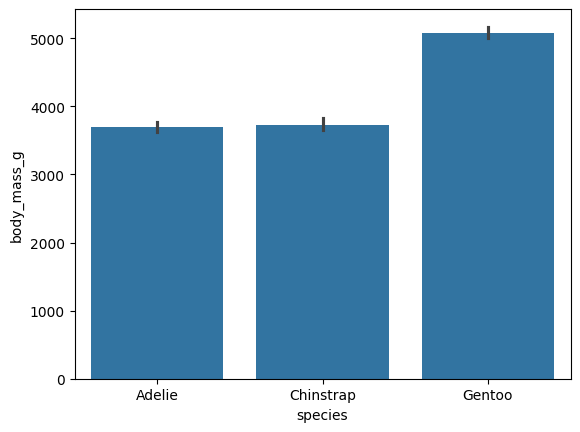

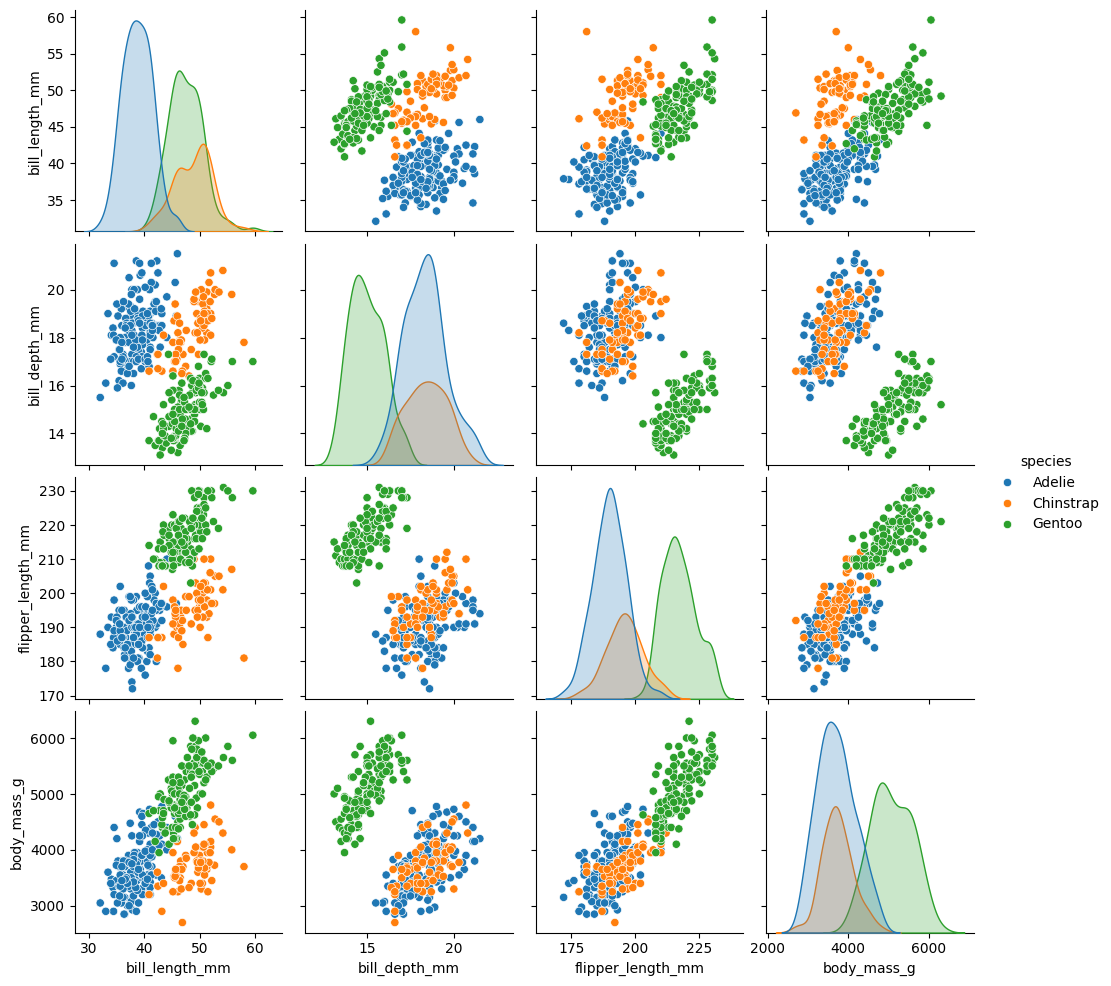

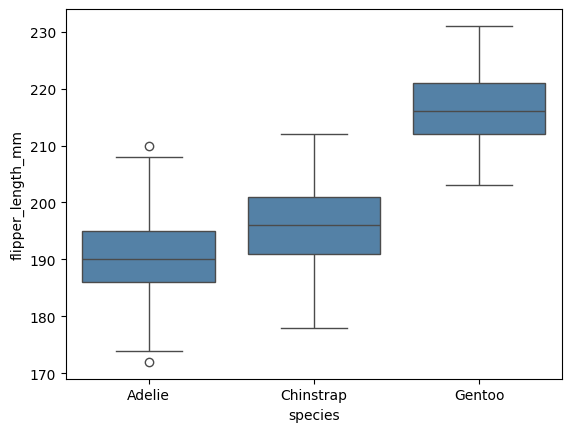

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

penguins = sns.load_dataset("penguins")

#Bar Plot: Create a bar plot showing the average body mass for each penguin species.
#Pairplot: Create a pair plot showing relationships between numerical features of the penguins dataset, categorized by species.
#Box Plot: Create a box plot showing the distribution of flipper length for each species.

sns.barplot(x="species", y="body_mass_g", data=penguins)
plt.show()
sns.pairplot(penguins, hue="species")
plt.show()
sns.boxplot(x="species", y="flipper_length_mm", data=penguins, color = 'steelblue')
plt.show()

In [ ]:
#Scatter Plot: Create an interactive scatter plot showing the relationship between GDP per capita and life expectancy for the year 2007.
#Bar Plot: Create a bar chart showing the total population for each continent in 2007.
#3D Plot: Create a 3D scatter plot to visualize GDP per capita, life expectancy, and population for the year 2007.
#Line Plot: Create a line plot showing the evolution of life expectancy over time for a selected country (e.g., India,UAE,Germany,China,Australia,Russia).

import plotly.express as px
gapminder = px.data.gapminder()
gapminder_2007 = gapminder[gapminder["year"] == 2007]

fig = px.scatter(gapminder_2007, x="gdpPercap", y="lifeExp", color="continent", hover_name="country")
fig.show()

fig = px.bar(gapminder_2007, x="continent", y="pop", color="continent")
fig.show()

fig = px.scatter_3d(gapminder_2007, x="gdpPercap", y="lifeExp", z="pop", color="continent")
fig.show()

countries = [""]
fig = px.line(gapminder[gapminder['country'].isin(['India'])], x="year", y="lifeExp", color="country", line_group="country", hover_name="country")
fig.show()


<ipython-input-39-4fb92eaa548e>:8: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



<Axes: xlabel='month', ylabel='year'>

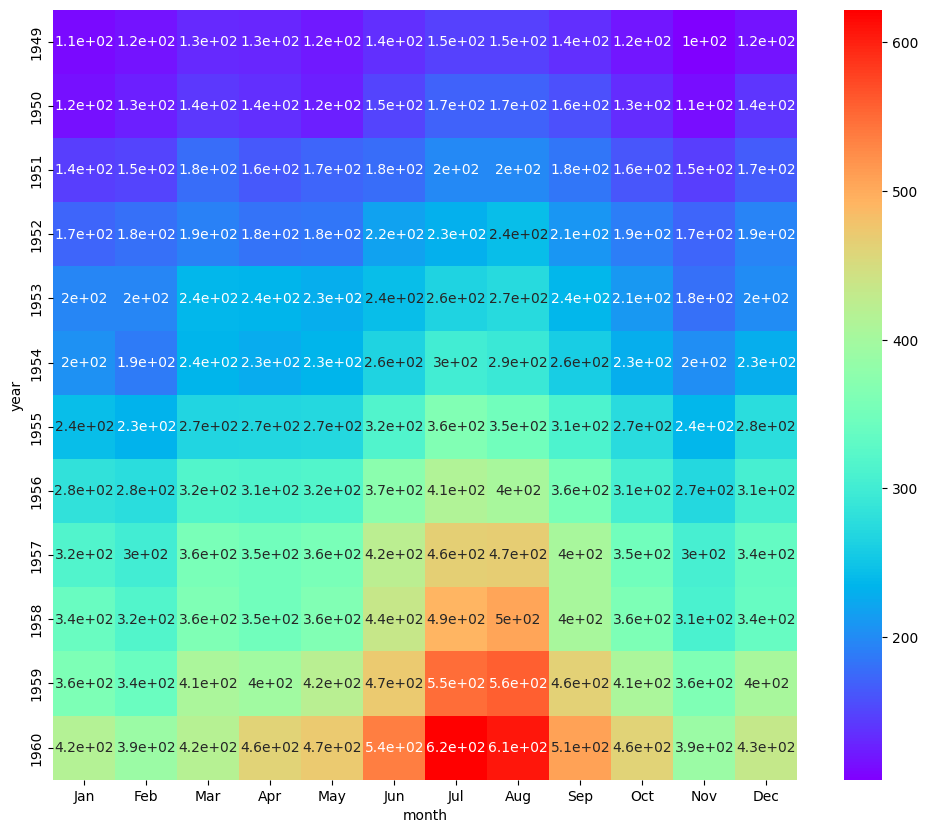

In [39]:
# Load the flights dataset from Seaborn. Create a heatmap to show the number of passengers for each month and year. Customize the heatmap with labels and a color bar.

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
flights = sns.load_dataset("flights")
flights_pivot = flights.pivot_table(index="year", columns="month", values="passengers")
sns.heatmap(flights_pivot, annot=True, cmap="rainbow")

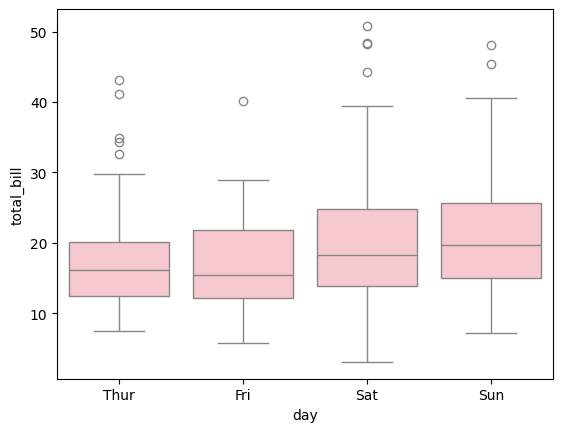

In [50]:
# Load the tips dataset. First, create a Seaborn boxplot to show the distribution of total_bill across different days of the week. Then, create an interactive Plotly pie chart showing the percentage contribution of each day to the total number of records.

import plotly.express as px
tips = sns.load_dataset("tips")

sns.boxplot(x="day", y="total_bill", data=tips, color='pink')
fig = px.pie(tips, names="day", values="total_bill")
fig.show()
